In [1]:
%matplotlib tk
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
path = '../images/'

# Direct Linear Transform
1. For the given image calib-object.jpg , use any 20-30 different points on different
planes and perform the Direct Linear Transform (DLT) based calibration as dis-
cussed in class. Note that you need to manually estimate the image co-ordinates of
the given world points and refer to calib-object-legend.jpg for world measure-
ments.

Assume these two scales :

(a) Scale of each chessblock = 28x28mm <br>
(b) Scale of each chessblock = 2800x2800mm <br>
Perform these three experiments, report the projection matrix and reconstruction error, for both the above mentioned scales: <br>


In [2]:
def display_img_arr(img_arr, r, c, dim,titles_arr):
    fl = 0
    fig = plt.figure(figsize = dim)
    for i in range(r):
        for j in range(c):
            if len(img_arr) == fl:
                break
            ax1 = fig.add_subplot(r, c, fl + 1)
            ax1.set_title(titles_arr[fl], fontsize = 20)
            ax1.imshow(img_arr[fl], cmap = 'gray')
            fl = fl + 1
    plt.show()

In [3]:
image_points = []
fig = plt.figure(figsize=(20,30))

img=mpimg.imread(path+'calib-object.jpg')

def onclick(event):
    image_points.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

In [5]:
#For axis convention
img_coord=mpimg.imread(path+'calib-object-legend.jpg')
plt.imshow(img_coord)

[[ 643.20407596 1914.94634591]
 [ 648.70570265 2113.0049065 ]
 [ 665.2105827  2311.06346708]
 [ 676.21383606 2498.1187743 ]
 [ 681.71546274 2685.17408152]
 [ 698.22034279 2872.22938874]
 [ 709.22359616 3053.78306927]
 [ 725.72847621 3224.33349644]
 [ 725.72847621 3394.88392361]
 [1556.47410532 1777.40567884]
 [1561.97573201 1942.45447933]
 [1556.47410532 2096.50002645]
 [1550.97247864 2261.54882694]
 [1550.97247864 2410.09274737]
 [1550.97247864 2569.63992118]
 [1556.47410532 2712.68221493]
 [1550.97247864 2861.22613537]
 [1556.47410532 3004.26842913]
 [2425.73112122 1931.45122596]
 [2414.72786786 2135.01141323]
 [2409.22624117 2327.56834713]
 [2392.72136112 2520.12528103]
 [2381.71810776 2707.18058825]
 [2370.71485439 2894.23589547]
 [2370.71485439 3075.789576  ]
 [2359.71160103 3251.84162986]
 [2343.20672098 3416.89043034]
 [1160.35698416 2360.57810723]
 [1925.08309308 2371.58136059]]


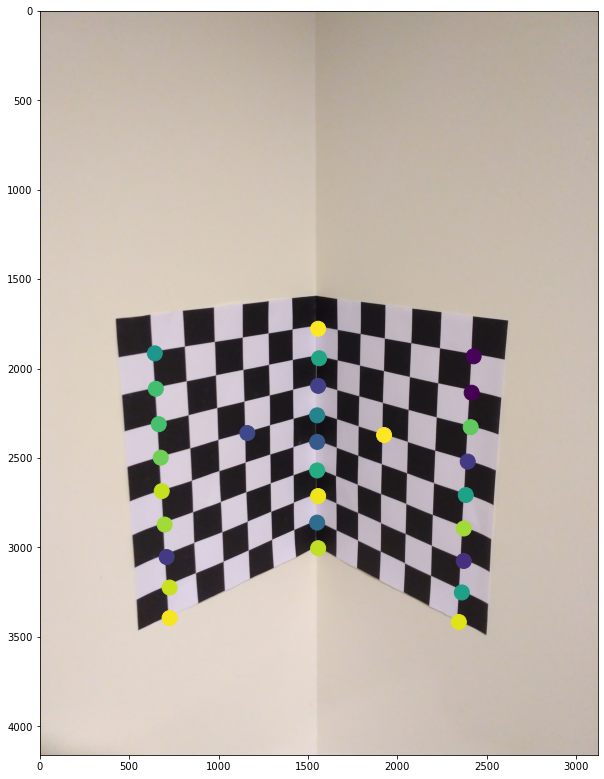

In [4]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
print(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread(path+'calib-object.jpg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

In [6]:
image_points= np.array([[ 643.20407596, 1914.94634591],
 [ 648.70570265, 2113.0049065 ],
 [ 665.2105827 , 2311.06346708],
 [ 676.21383606, 2498.1187743 ],
 [ 681.71546274 ,2685.17408152],
 [ 698.22034279 ,2872.22938874],
 [ 709.22359616, 3053.78306927],
 [ 725.72847621, 3224.33349644],
 [ 725.72847621, 3394.88392361],
 [1556.47410532, 1777.40567884],
 [1561.97573201 ,1942.45447933],
 [1556.47410532 ,2096.50002645],
 [1550.97247864 ,2261.54882694],
 [1550.97247864 ,2410.09274737],
 [1550.97247864 ,2569.63992118],
 [1556.47410532 ,2712.68221493],
 [1550.97247864 ,2861.22613537],
 [1556.47410532 ,3004.26842913],
 [2425.73112122 ,1931.45122596],
 [2414.72786786 ,2135.01141323],
 [2409.22624117 ,2327.56834713],
 [2392.72136112 ,2520.12528103],
 [2381.71810776 ,2707.18058825],
 [2370.71485439 ,2894.23589547],
 [2370.71485439 ,3075.789576  ],
 [2359.71160103 ,3251.84162986],
 [2343.20672098 ,3416.89043034],
 [1160.35698416 ,2360.57810723],
 [1925.08309308 ,2371.58136059]])
print(image_points.shape)

(29, 2)


### Case 1 Scale of each chessblock = 28x28mm <br>
(a) Use original data points as input. <br>
Perform reconstruction on the original data points. (main experiment)

In [7]:
x = image_points
# X represents the 3D world points
X = np.array([[6,0,-1],[6,0,-2],[6,0,-3],[6,0,-4],[6,0,-5],[6,0,-6],[6,0,-7],[6,0,-8],[6,0,-9],
    [0,0,-1],[0,0,-2],[0,0,-3],[0,0,-4],[0,0,-5],[0,0,-6],[0,0,-7],[0,0,-8],[0,0,-9],
    [0,6,-1],[0,6,-2],[0,6,-3],[0,6,-4],[0,6,-5],[0,6,-6],[0,6,-7],[0,6,-8],[0,6,-9],
    [3,0,-4],[0,3,-4]])*28
X_nonhomo = X.copy()

In [8]:
#appends a ones column to input
def hom_coords(x,X):
    ones = np.ones((x.shape[0],1))
    x = np.concatenate(
        (x,ones),
        axis = 1)
    X = np.concatenate(
        (X,ones),
        axis = 1)
    return x, X

print(x[1].shape, X[1].shape)
x,X = hom_coords(x,X)
print(x[1].shape, X[1].shape)

(2,) (3,)
(3,) (4,)


In [9]:
def DLT(x,X):
    """
    input x: the image points
    X: world points
    return Projection matrix (3x4)
    """  
    i = 0
    M = np.array([-X[i][0], -X[i][1], -X[i][2], -X[i][3], 0, 0, 0, 0, x[i][0] * X[i][0], x[i][0] * X[i][1], x[i][0] * X[i][2], x[i][0] * X[i][3]])
    M = np.vstack((M, [0, 0, 0, 0, -X[i][0], -X[i][1], -X[i][2], -X[i][3], x[i][1] * X[i][0], x[i][1] * X[i][1], x[i][1] * X[i][2], x[i][1] * X[i][3]]))
    
    for i in range(1,len(x)):
        M = np.vstack((M, [-X[i][0], -X[i][1], -X[i][2], -X[i][3], 0, 0, 0, 0, x[i][0] * X[i][0], x[i][0] * X[i][1], x[i][0] * X[i][2], x[i][0] * X[i][3]]))
        M = np.vstack((M, [0, 0, 0, 0, -X[i][0], -X[i][1], -X[i][2], -X[i][3], x[i][1] * X[i][0], x[i][1] * X[i][1], x[i][1] * X[i][2], x[i][1] * X[i][3]]))
    print(M.shape)
    u, d, vt = np.linalg.svd(M)  
    P = vt[-1].reshape(3,4)
    #The last column of vt is the eigenvector corresponding to the last eigenvalue.
#     P = P/P[2][3]
    return P
def dlt(w,image_points):
    here=[]
    for i in range(len(w)):
        temp=[0 for j in range(12)]
        for j in range(4):
            temp[j]=w[i][j]
        for j in range(4):
            temp[j+8]=-image_points[i][0]*w[i][j]
        here.append(temp)
        temp=[0 for j in range(12)]
        for j in range(4):
            temp[j+4]=w[i][j]
        for j in range(4):
            temp[j+8]=-image_points[i][1]*w[i][j]
        here.append(temp)
    here=np.array(here)
    u,d,vt = np.linalg.svd(here)
    p=vt[-1].reshape(3,4)
    p=p/p[2][3]
    #print(p)
    return p

P = DLT(x,X)
print(P)

(58, 12)
[[ 2.78590984e-03 -1.04245227e-03  2.55009121e-04 -6.94788038e-01]
 [ 6.35968725e-04  6.23720332e-04  2.96409591e-03 -7.19201565e-01]
 [ 5.22835403e-07  5.36508786e-07  1.63126289e-07 -4.47117271e-04]]


In [10]:
#Get reprojected points
def get_points(P,X,norm = False,T_ = None):
    points = P@X.T
    if(norm==True):
        points = np.linalg.inv(T_)@points
    points = points / points[2]
    points = points.T[:,0:2]
    return points

#Get reprojection error
def get_err(x, X, P):
    points = get_points(P, X)
    points,_ = hom_coords(points,x)
    err = np.sqrt(np.mean((points - x) ** 2))
    print("rmse ",err)
    return err
get_err(x,X,P)

rmse  2.713312839752603


2.713312839752603

In [11]:
def reproject(P,X,norm=False,T_=None):  
    
    re_proj = get_points(P, X, norm, T_)
    re_proj = np.array(re_proj).astype('float32') 

    finalX = np.hstack((x[ : , 0], re_proj[ : , 0]))
    finalY = np.hstack((x[ : , 1], re_proj[ : , 1]))

    %matplotlib inline
    N = len(finalX)
    
    fig = plt.figure(figsize=(10,15))

    img=mpimg.imread(path+'calib-object.jpg')
    imgplot = plt.imshow(img)

    colors = np.random.rand(N)
    area = (15 * np.ones(N))**2 
    
    plt.scatter(finalX[ : ], finalY[ : ], c = colors, s = area)
    plt.show()
    
reproject(P,X)

(b) Use normalized data points as input.
Perform reconstruction on the normalized data points (without denormalizing the projection matrix obtained) <br>


In [12]:
def find_d_2d(x):
    x_points = x[:,0]
    y_points = x[:,1]
    x_mean = np.mean(x_points)
    y_mean = np.mean(y_points)
    d_mean = np.mean(np.sqrt((x_points - x_mean)**2 + (y_points-y_mean)**2))
    return d_mean,x_mean, y_mean
 

In [13]:
def normalize_imagePoints(x):
    d_mean, x_mean, y_mean = find_d_2d(x)   
    root2 = np.sqrt(2)
    T = np.array([[root2/d_mean,0,-root2*x_mean/d_mean],
                  [0,root2/d_mean,-root2*y_mean/d_mean],
                  [0,0,1]])
    x_normalized = (T@x.T).T
    return x_normalized, T
    

In [14]:
x_normalized, T = normalize_imagePoints(x)
print(x_normalized.shape)

(29, 3)


In [15]:
def find_d_3d(x):
    x_points = x[:,0]
    y_points = x[:,1]
    z_points = x[:,2]
    x_mean = np.mean(x_points)
    y_mean = np.mean(y_points)
    z_mean = np.mean(z_points)
    d_mean = np.mean(np.sqrt((x_points - x_mean)**2 + (y_points-y_mean)**2+ (z_points-z_mean)**2))
    return d_mean,x_mean, y_mean,z_mean

In [16]:
def normalize_modelPoints(X):
    d_mean, x_mean, y_mean,z_mean = find_d_3d(X)   
    root3 = np.sqrt(3)
    U = np.array([[root3/d_mean,0,0,-root3*x_mean/d_mean],
                  [0,root3/d_mean,0,-root3*y_mean/d_mean],
                  [0,0,root3/d_mean,-root3*z_mean/d_mean],
                  [0,0,0,1]])
    print(U.shape,X.shape)
    x_normalized = (U@X.T).T
    return x_normalized, U

In [17]:
X_normalized, U = normalize_modelPoints(X)

(4, 4) (29, 4)


In [18]:
x_normalized.shape, X_normalized.shape

((29, 3), (29, 4))

In [19]:
P2 = DLT(x_normalized,X_normalized)

(58, 12)


In [20]:
err = get_err(x_normalized,X_normalized,P2)

rmse  0.005123849848706961


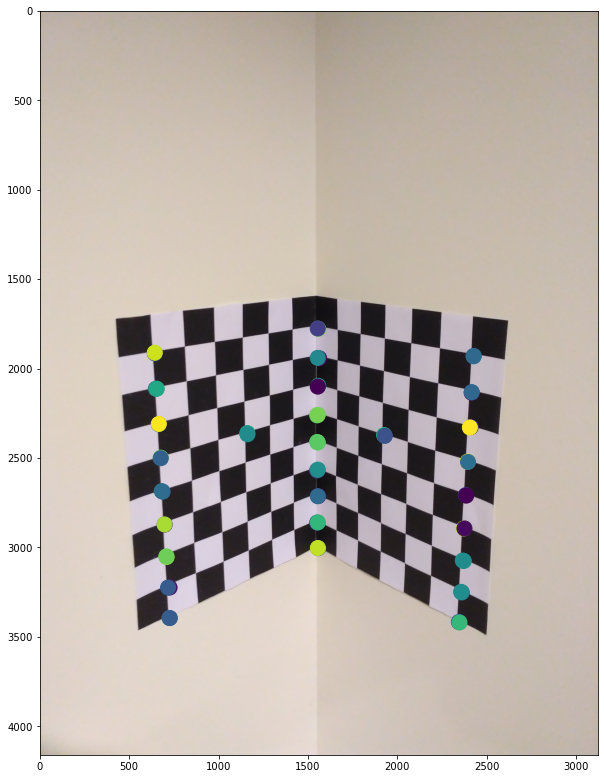

In [21]:
reproject(P2,X_normalized,norm=True, T_=T)

(c) Use normalized data points as input. <br>
Perform reconstruction on the original data points (with the denormalized projection matrix).
Do the results vary between the above experiments? If yes, report how and why are the variations observed.  <br>

In [22]:
T_inv = np.linalg.inv(T)
P_denormalized = T_inv @ P2 @ U

In [23]:
print(P_denormalized)

[[-4.11892056e+00  1.54505128e+00 -3.78189482e-01  1.02732687e+03]
 [-9.36526429e-01 -9.18464937e-01 -4.38634519e+00  1.06318403e+03]
 [-7.71768883e-04 -7.92021003e-04 -2.41858812e-04  6.61132912e-01]]


In [24]:
err = get_err(x,X,P_denormalized)

rmse  2.7121550622105977


In [25]:
reproject(P_denormalized,X)

### Case 2 Scale of each chessblock = 2800x2800mm <br>
(a) Use original data points as input. <br>
Perform reconstruction on the original data points. (main experiment)

In [26]:
X = np.array([[6,0,1],[6,0,2],[6,0,3],[6,0,4],[6,0,5],[6,0,6],[6,0,7],[6,0,8],[6,0,9],
    [0,0,1],[0,0,2],[0,0,3],[0,0,4],[0,0,5],[0,0,6],[0,0,7],[0,0,8],[0,0,9],
    [0,6,1],[0,6,2],[0,6,3],[0,6,4],[0,6,5],[0,6,6],[0,6,7],[0,6,8],[0,6,9],
    [3,0,4],[0,3,4]])*28
X2 = X.copy()*100  #2800x2800 mm

x = image_points
x,X2 = hom_coords(x.copy(),X2.copy())
P_case2 = DLT(x.copy(),X2.copy())
get_err(x.copy(),X2.copy(),P_case2.copy())
reproject(P_case2.copy(),X2.copy())


(58, 12)
rmse  2.7133128334771444


(b) Use normalized data points as input. Perform reconstruction on the normalized data points (without denormalizing the projection matrix obtained)



In [27]:
x_normalized2, T2 = normalize_imagePoints(x)
X_normalized2, U2 = normalize_modelPoints(X2)
P_norm = DLT(x_normalized2,X_normalized2)
print('normalised P \n',P_norm)
err = get_err(x_normalized2,X_normalized2,P_norm)
reproject(P_norm,X_normalized2,norm=True, T_=T2)

(4, 4) (29, 4)
(58, 12)
normalised P 
 [[-0.40388928  0.38149153  0.00072118 -0.00074369]
 [ 0.14498029  0.15466448  0.5189793  -0.00096893]
 [-0.05633477 -0.05781306  0.01765433  0.60846374]]
rmse  0.005123849848706932


(c) Use normalized data points as input. <br>
Perform reconstruction on the original data points (with the denormalized projection matrix).
Do the results vary between the above experiments? If yes, report how and why are the variations observed.  <br>

In [28]:
T_inv2 = np.linalg.inv(T2)
P_denormalized2 = T_inv2 @ P_norm @ U2
print(P_denormalized2)
print(x.shape,X2.shape)

err = get_err(x,X2,P_denormalized2)
reproject(P_denormalized2,X2)

[[-4.11892056e-02  1.54505128e-02  3.78189482e-03  1.02732687e+03]
 [-9.36526429e-03 -9.18464937e-03  4.38634519e-02  1.06318403e+03]
 [-7.71768883e-06 -7.92021003e-06  2.41858812e-06  6.61132912e-01]]
(29, 3) (29, 4)
rmse  2.712155062210591


Do the results vary between the above experiments? If yes, report how and why
are the variations observed.

**Ans**

case 1: rmse when no normalization  2.713290986546861 <br>
case 2: rmse on normalization 0.005123849848414351 <br>
case 3: rmse on denormalization 2.7121550622105697

* **On normalization**  <br>
 Error is considerably lower than that of the original data points. <br> 
  *Reason*:  The similarity transformation (translation and scaling) is computed in normalization which makes the centroid of points zero, and average absolute coordinate value to 1.
  

* **Prediction matrix is denormalised** <br>
Error  similar to that of original error(as in case 1)


* **Two different scales (28 mm and 2800 mm)** <br> same results, thus DLT is scale invariant 

2. Decompose the projection matrix obtained for the main experiment above and report: <br>
(a) camera matrix (K) <br>
(b) rotation matrix (R) <br>
(c) projection center (C) <br>
Notice that upon QR decomposition to obtain K and R, the obtained K matrix might have positive diagonal elements. This indicates a positive camera constant, while we usually assume it to be negative in theory as it becomes easier to handle
signs. To fix this we use the following method: <br>
K = KR(z, π) and R = R(z, π)R <br>
Be sure to fix the matrices using this method. 

In [29]:
def get_KRX0(P):
    #P = [KR|-KRX0] = [H|h]
    H = P[0:3, 0:3]   
    h = -P[:,-1]  
    X0 = np.linalg.inv(H)@h 
    #QR decomposition
    Rinv, Kinv = np.linalg.qr(np.linalg.inv(H))
    R = Rinv.T
    K = np.linalg.inv(Kinv)
    return R, K , X0

R, K, X0 = get_KRX0(P)
K = K/K[2][2] 
print("Camera Intrinsics Matrix K \n",K)
print("\n Rotation Matrix R \n", R)
print("\n Projection Canter X0 \n",X0)

#this gives us positive camera constant, now to get negative camera constant
Rz_pi = np.array([[-1,0,0],[0,-1,0],[0,0,1]])
K_new = K@Rz_pi
R_new = Rz_pi@R
print('\n \nfixed matrices')
print("Camera Intrinsics Matrix K \n",K_new)
print("\n Rotation Matrix R \n", R_new)

Camera Intrinsics Matrix K 
 [[-3.55127153e+03  1.90407848e+01  1.59726480e+03]
 [ 0.00000000e+00  3.53054356e+03  1.95754218e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 Rotation Matrix R 
 [[-0.71725995  0.6967677   0.00727599]
 [-0.14315819 -0.15757163  0.9770757 ]
 [ 0.68194127  0.69977565  0.21276782]]

 Projection Canter X0 
 [401.06558838 421.92328453  67.802888  ]

 
fixed matrices
Camera Intrinsics Matrix K 
 [[ 3.55127153e+03 -1.90407848e+01  1.59726480e+03]
 [ 0.00000000e+00 -3.53054356e+03  1.95754218e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 Rotation Matrix R 
 [[ 0.71725995 -0.6967677  -0.00727599]
 [ 0.14315819  0.15757163 -0.9770757 ]
 [ 0.68194127  0.69977565  0.21276782]]


Show how the decomposition still holds true with these transformed matrices.
We have,
$$H_{old}=KR$$ 
$$H_{new}=(KR(z,\pi))
(R(z,\pi)R)$$
$$H_{new} = K(R(z,\pi)R(z,\pi))R$$
$$H_{new} = KR(z,2\pi)R$$
$$H_{new} = KIR$$
$$H_{new} = KR =H_{old}$$

# 3 
(a) Implement the RANSAC based variant of the above calibration method and
report your observations for main experiment. <br>
(b) RANSAC is said to be successful if in atleast 1 of the iterations, it selects only
inliers (correct correspondences) from the input data points. Assume that your accuracy for annotating the points for the above experiment is 80%. What is the minimum number of iterations you will have to run RANSAC for getting
probability of success greater than 95%? <br>
(c) Assuming the same accuracy, plot a curve of Probability of success of RANSAC vs Number of iterations required.


ref: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html

In [30]:
def get_randomPointsInd(num_points,k):
    return np.random.choice(num_points, k)


def select_points(x,ind):
    points = []
    for i in ind:
        points.append(x[i])
    return np.array(points)
x = image_points
X = np.array([[6,0,1],[6,0,2],[6,0,3],[6,0,4],[6,0,5],[6,0,6],[6,0,7],[6,0,8],[6,0,9],
    [0,0,1],[0,0,2],[0,0,3],[0,0,4],[0,0,5],[0,0,6],[0,0,7],[0,0,8],[0,0,9],
    [0,6,1],[0,6,2],[0,6,3],[0,6,4],[0,6,5],[0,6,6],[0,6,7],[0,6,8],[0,6,9],
    [3,0,4],[0,3,4]])*28

x,X = hom_coords(x.copy(),X.copy())

In [31]:
iters = 200
num_points = x.shape[0]
threshold = 1e-10
least_err = 1e15

best_P = np.array((3,4))

for i in range(iters):
    #random 6 points
    randomPoints_Index = get_randomPointsInd(num_points,6)
    
    #select points acc to above index
    x_rands = select_points(x,randomPoints_Index)
    X_rands = select_points(X,randomPoints_Index)
    
    #apply DLT and find error
    P = DLT(x_rands,X_rands)
    #calc error on all points(even those not in random set)
    err = get_err(x,X,P)
    
#     if(err<threshold):
#         print('converged')
#         break
    print(i,err)
    if(err< least_err):
        best_P = P
        least_err = err
print('least error ',least_err)
print('best P \n',best_P)

# find params for best P
R, K, X0 = get_KRX0(best_P)
K = K/K[2][2] #Normalising to get 1.

#apply correction
Rz_pi = np.array([[-1,0,0],[0,-1,0],[0,0,1]])
K = K@Rz_pi
R = Rz_pi@R  


print('K \n',K)
print('R \n',R)

(12, 12)
rmse  298.3256792503338
0 298.3256792503338
(12, 12)
rmse  546.7196132313203
1 546.7196132313203
(12, 12)
rmse  2491.378292694473
2 2491.378292694473
(12, 12)
rmse  1227.941890973946
3 1227.941890973946
(12, 12)
rmse  nan
4 nan
(12, 12)
rmse  251.08399201812907
5 251.08399201812907
(12, 12)
rmse  nan
6 nan
(12, 12)
rmse  7.238795859616429
7 7.238795859616429
(12, 12)
rmse  173.987820510358
8 173.987820510358
(12, 12)
rmse  274.8030629238737
9 274.8030629238737
(12, 12)
rmse  300.0333909783304
10 300.0333909783304
(12, 12)
rmse  229.5752328399242
11 229.5752328399242
(12, 12)
rmse  4.967929451870306
12 4.967929451870306
(12, 12)
rmse  257.49592171413235
13 257.49592171413235
(12, 12)
rmse  217.1701617566132
14 217.1701617566132
(12, 12)
rmse  316.8108531214266
15 316.8108531214266
(12, 12)
rmse  581.937436910748
16 581.937436910748
(12, 12)
rmse  326.3277076253891
17 326.3277076253891
(12, 12)
rmse  9.052034951095264
18 9.052034951095264
(12, 12)
rmse  9418.942851193224
19 9418

<ipython-input-10-183423e1f537>:6: RuntimeWarning: divide by zero encountered in true_divide
  points = points / points[2]
<ipython-input-10-183423e1f537>:6: RuntimeWarning: invalid value encountered in true_divide
  points = points / points[2]


rmse  315.5513460835301
149 315.5513460835301
(12, 12)
rmse  253.15535565620925
150 253.15535565620925
(12, 12)
rmse  3.7642332708245188
151 3.7642332708245188
(12, 12)
rmse  1213.0535832044366
152 1213.0535832044366
(12, 12)
rmse  245.40870427811444
153 245.40870427811444
(12, 12)
rmse  247.18698784993532
154 247.18698784993532
(12, 12)
rmse  4.329331245341321
155 4.329331245341321
(12, 12)
rmse  247.28139433502443
156 247.28139433502443
(12, 12)
rmse  265.40551877134396
157 265.40551877134396
(12, 12)
rmse  8.794169457853057
158 8.794169457853057
(12, 12)
rmse  nan
159 nan
(12, 12)
rmse  4391.821897328762
160 4391.821897328762
(12, 12)
rmse  185.44359463766034
161 185.44359463766034
(12, 12)
rmse  297.78303481072015
162 297.78303481072015
(12, 12)
rmse  1213.0547842963815
163 1213.0547842963815
(12, 12)
rmse  997.1340874739469
164 997.1340874739469
(12, 12)
rmse  257.31734542682193
165 257.31734542682193
(12, 12)
rmse  181.34346746241084
166 181.34346746241084
(12, 12)
rmse  332.1627

In [32]:
reproject(best_P,X)

#Trials needed to succed $$T=\frac{log(1-p)}{log(1-(1-e)^s)}$$ <br>
where p is probability of success <br>
e is outlier ratio = 1 - accuracy <br>
s is number of samples we take  <br>


given accuracy 80%,
T = ? for probability of success > 95%
e = 1 - .8
p >= .95 (for minimum trials take p=95)


In [33]:
e = 1-0.8
s = 6
p = 0.95
T = np.log(1-p)/np.log(1-(1-e)**s)
print(T)

9.854168689635499


thus minimum number of trials needed = 10

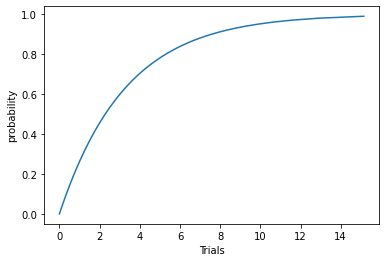

In [34]:
#p vs T
%matplotlib inline
p = np.arange(0,1,0.01)
T = np.log(1-p)/np.log(1-(1-e)**s)
plt.xlabel('Trials')
plt.ylabel('probability')
plt.plot(T,p)



# Zhangs

In [35]:
import cv2
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

filenames = os.listdir('../images/Zhangs/')
print(filenames)


['IMG_5460.JPG', 'IMG_5470.JPG', 'IMG_5469.JPG', 'IMG_5462.JPG', 'IMG_5466.JPG', 'IMG_5458.JPG', 'IMG_5463.JPG', 'IMG_5459.JPG', 'IMG_5467.JPG', 'IMG_5464.JPG', 'IMG_5461.JPG', 'IMG_5468.JPG', 'IMG_5465.JPG', 'IMG_5456.JPG', 'IMG_5457.JPG']


In [36]:
images = []
for i,f in enumerate(filenames):
    img = cv2.imread('../images/Zhangs/'+ f)
    images.append(img)

In [37]:
x,y = np.meshgrid(range(8),range(6))
world_points=np.hstack((x.reshape(48,1),y.reshape(48,1),np.zeros((48,1)))).astype(np.float32)
print(world_points)
indices = np.arange(48)
indices = indices.reshape((6,8))
print(indices)

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]


In [38]:
out_images = []
threeD_points=[]
twoD_points=[]

for im in images:
    success, corners = cv2.findChessboardCorners(im, (8,6))
    if success:
        twoD_points.append(corners)
        threeD_points.append(world_points) 
    #draw circles at each of corners detected
    for corner in corners:
        cv2.circle(im,(corner[0,0],corner[0,1]),6,(0,255,0),60)
    out_images.append(im)


<ipython-input-38-4a300531a0d9>:12: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(im,(corner[0,0],corner[0,1]),6,(0,255,0),60)


In [39]:
display_img_arr(out_images, int(len(out_images)/3), 3, (20, 20), np.arange(0,len(out_images),1))

In [40]:
twoD_points[0].shape, threeD_points[0].shape

((48, 1, 2), (48, 3))

In [41]:
# calibrate using opencv function
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(threeD_points, twoD_points, (im.shape[1],im.shape[0]), None, None)

print ("Error ",ret)
print ("\nK  \n",K)
print ("\nRotation vectors for all images \n",rvecs)
print ("\nTranslation vectors for all images \n",tvecs)

Error  2.48108498386384

K  
 [[1.36634773e+04 0.00000000e+00 3.33653656e+03]
 [0.00000000e+00 1.36813826e+04 1.49660118e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Rotation vectors for all images 
 [array([[0.00456626],
       [0.30778498],
       [0.06543949]]), array([[-0.44149986],
       [-0.42570043],
       [ 0.05239043]]), array([[-0.37472658],
       [-0.48684469],
       [ 0.02851412]]), array([[-0.19221712],
       [-0.38502427],
       [-0.00381479]]), array([[ 0.22457427],
       [-0.40589216],
       [-0.05699645]]), array([[-0.00906861],
       [-0.41619662],
       [-0.03572076]]), array([[ 0.24427921],
       [-0.32262063],
       [ 0.02472159]]), array([[ 0.01633962],
       [-0.61839259],
       [-0.07755518]]), array([[-0.11332318],
       [-0.29806938],
       [ 0.00488492]]), array([[0.31114498],
       [0.0663294 ],
       [0.07053942]]), array([[-0.32566614],
       [-0.22232074],
       [-0.01742858]]), array([[-0.38084109],
       [ 0.00764403],
   

## Draw wireframes

In [42]:
len(threeD_points)

15

In [43]:
indices

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [44]:
# Project points
for i in range(len(images)):
    pred2d, _ = cv2.projectPoints(threeD_points[i], rvecs[i], tvecs[i], K, dist)
    
    for j in range(len(pred2d)):
        images[i] = cv2.circle(images[i], (int(pred2d[j][0][0]), int(pred2d[j][0][1])), 30, (0, 255, 0), -1)
    
    for j in range(indices.shape[0]-1):
        # corner lines
        images[i] = cv2.line(images[i], (int(pred2d[indices[j,indices.shape[1]-1], :][:2][0][0]),int(pred2d[indices[j,indices.shape[1]-1], :][:2][0][1])), (int(pred2d[indices[j+1,indices.shape[1]-1], :][:2][0][0]),int(pred2d[indices[j+1,indices.shape[1]-1], :][:2][0][1])), (0, 255, 0), 10)
        
        for k in range(indices.shape[1]-1):
            #middle points lines
            images[i] = cv2.line(images[i], (int(pred2d[indices[j, k], :][:2][0][0]),int(pred2d[indices[j, k], :][:2][0][1])), (int(pred2d[indices[j+1, k], :][:2][0][0]),int(pred2d[indices[j+1, k], :][:2][0][1])), (0, 255, 0), 10)
            images[i] = cv2.line(images[i], (int(pred2d[indices[j, k], :][:2][0][0]),int(pred2d[indices[j, k], :][:2][0][1])), (int(pred2d[indices[j, k+1], :][:2][0][0]),int(pred2d[indices[j, k+1], :][:2][0][1])), (0, 255, 0), 10)
            
            #corner lines
            images[i] = cv2.line(images[i], (int(pred2d[indices[indices.shape[0]-1, k], :][:2][0][0]),int(pred2d[indices[indices.shape[0]-1, k], :][:2][0][1])), (int(pred2d[indices[indices.shape[0]-1, k+1], :][:2][0][0]),int(pred2d[indices[indices.shape[0]-1, k+1], :][:2][0][1])), (0, 255, 0), 10)
    

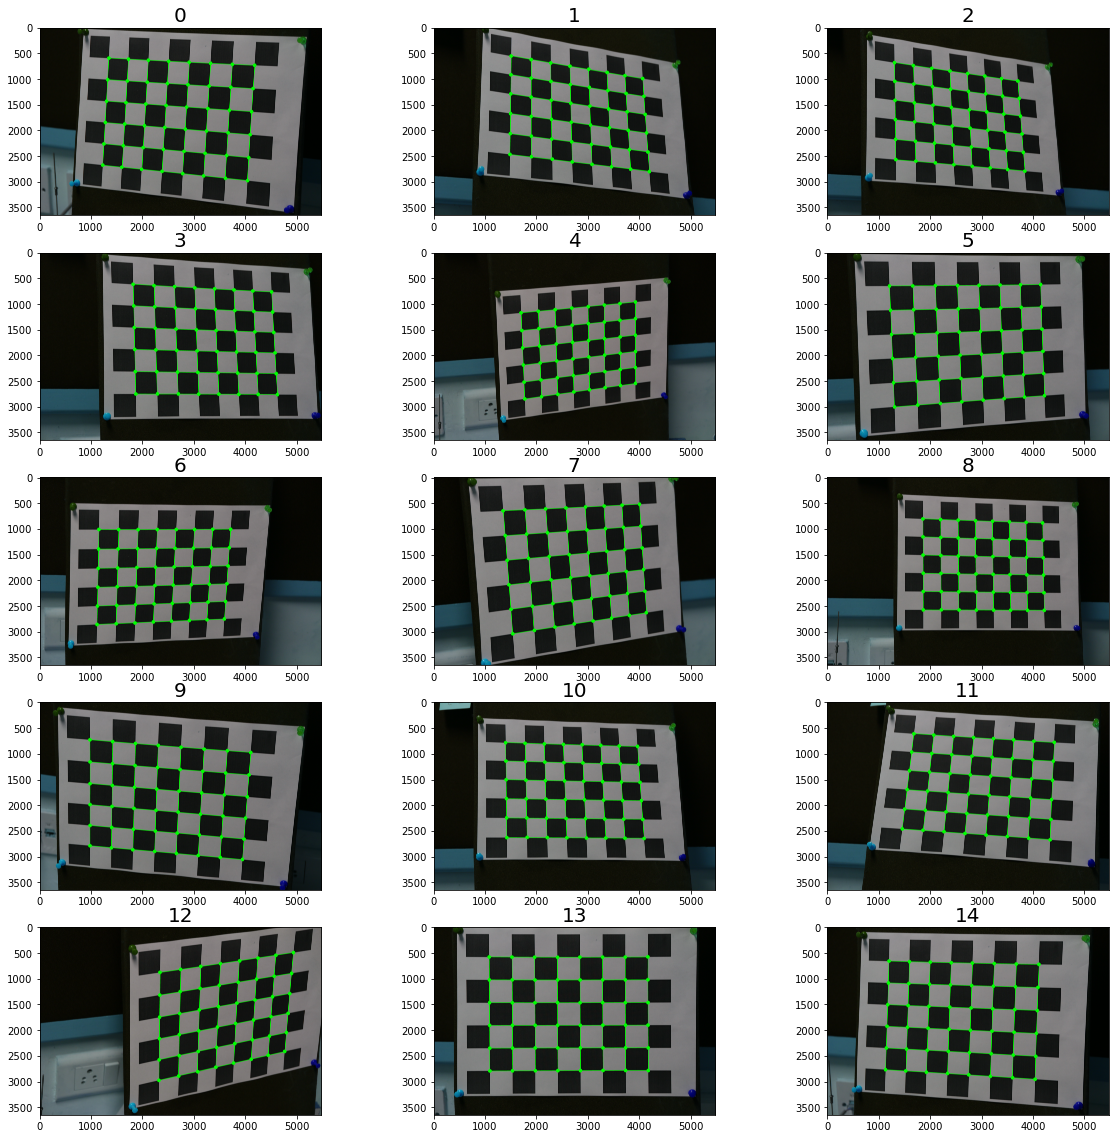

In [45]:
display_img_arr(images, int(len(images)/3), 3, (20, 20), np.arange(0,len(images),1))